## The relation between body mass and length

It is well known that there is a relationship between body mass and length of humans. This is normally seen as a linear relation between a body's squared length and its mass. Here we will try to investigate these properties based on simulated data.

First we will generate data based on the assumption that there is a linear relation between a humans squared length, but we allow for some spread around that relation.

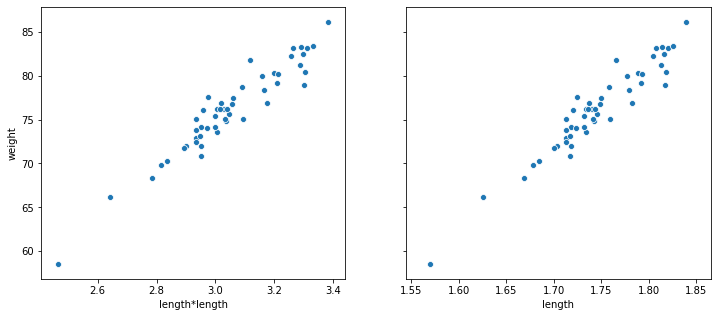

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd

m_length = 1.75 # meters
slope=25.
m_weight = slope*(m_length**2) # kg
s_weight = 5 # kg
s_ll = s_weight/slope 
cov = slope * (s_ll**2)
s_measure = 0.1
s_weight += s_measure
s_ll += s_measure/slope
S = [[s_weight**2, cov], [cov,s_ll**2]]
wh = pd.DataFrame(columns=['weight','length*length'],data=rnd.multivariate_normal([m_weight,m_length*m_length], S, 50))
wh["length"] = np.sqrt(wh["length*length"])   
wh["bmi"] = wh["weight"]/wh["length*length"]

import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,5))
sns.scatterplot(data=wh, y="weight", x="length*length", ax=ax1)
sns.scatterplot(data=wh, y="weight", x="length", ax=ax2)


Now given the distribution of simulated patients, what does a SVD of the data give us?
Lets first investigate the 1st eigenpatient.

In [256]:
from numpy.linalg import svd
X = wh[["length*length","weight"]].values
Xmean = np.mean(X, axis=0)
Xm = np.tile(Xmean[np.newaxis], (X.shape[0],1))
U,S,Vt = svd((X-Xm), full_matrices=True, compute_uv=True)


In [257]:
Vt[0]

array([0.03487246, 0.99939177])

The first component seem to give that the major variation of the data is in a direction wher for every movement in $length^2$ the component take 1/0.04 = 25 units in weight. Similarly, the second component stretches orthogonally:

In [258]:
Vt[1]

array([ 0.99939177, -0.03487246])

where we instead move in 25 times as steep in $length^2$ as compared to weight. We can plot these eigenpatients.

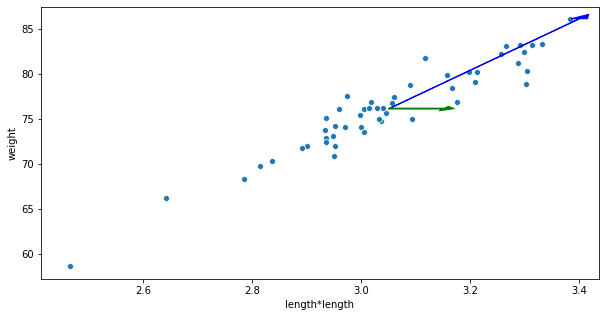

In [259]:
ax = plt.figure(figsize=(10,5))
ax = sns.scatterplot(data=wh, y="weight", x="length*length")
ax.arrow(Xmean[0], Xmean[1], Vt[0,0]*10, Vt[0,1]*10,
             head_width=0.03,         #arrow head width
             head_length=0.5,        #arrow head length
             width=0.002,              #arrow stem width
             fc='blue',             #arrow fill color
             ec='blue')
ax.arrow(Xmean[0], Xmean[1], Vt[1,0]*.1, Vt[1,1]*.1,
             head_width=0.5,         #arrow head width
             head_length=0.02,        #arrow head length
             width=0.1,              #arrow stem width
             fc='green',             #arrow fill color
             ec='green')

You might recognize that the covariation shown by the first eigenpatient is normaly seen as uninteresting, we all know that wieight is a function of the (squared) length. Often we calculate $bmi=\frac{weight}{length^2}$, a measure that focus on what is left once we removes the part of the variationthat depends on length.  